# projet poo 2bi4: 
    membres du groupe:
        -souha salhi
        -mariem mannai
        -malek ben drissia
        -emna makhlouka
        -ela saadli
        -mouheb mannai
        

# 1) Importation des bibliothèques & Lecture des données

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
data = pd.read_csv("C:/Users/souha/OneDrive/Desktop/pi sem2/synthetic_health_data.csv")
data.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


Âge : Âge de l'individu en années (variable continue).

IMC : Indice de Masse Corporelle de l'individu (variable continue).

Fréquence_Exercice : Nombre de jours par semaine où l'individu fait de l'exercice (catégorique, valeurs de 0 à 7).

Qualité_Régime : Un indice reflétant la qualité du régime, avec des valeurs plus élevées indiquant des habitudes alimentaires plus saines (continue, 0-100).

Heures_Sommeil : Heures moyennes de sommeil par nuit (continue).

Statut_Fumeur : Variable binaire où 0 = Non-fumeur, 1 = Fumeur.

Consommation_Alcool : Unités d'alcool consommées en moyenne par semaine (continue).

Score_Santé : Un score de santé calculé reflétant l'état de santé global (continu, 0-100).


# 2) Exploration des données

In [3]:
# Identifier les types des variables :

qualitative_vars = data.select_dtypes(include=['bool', 'object']).columns.tolist()
quantitative_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", qualitative_vars)
print("Variables quantitatives :", quantitative_vars)


Variables qualitatives : []
Variables quantitatives : ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours', 'Smoking_Status', 'Alcohol_Consumption', 'Health_Score']


### Détection des valeurs manquantes:

In [4]:
# Détecter les valeurs manquantes :
print(data.isnull().sum())


Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


### Statistiques descriptives

In [5]:
print("\nDescriptive statistics:")
print(data.describe())



Descriptive statistics:
               Age          BMI  Exercise_Frequency  Diet_Quality  \
count  1000.000000  1000.000000         1000.000000   1000.000000   
mean     40.231985    25.354181            2.888000     69.952977   
std      11.750591     4.987272            1.995354     14.972061   
min       1.104792    10.298057            0.000000     19.907497   
25%      32.228916    21.968792            1.000000     59.945481   
50%      40.303607    25.315386            3.000000     69.975151   
75%      47.775327    28.644411            5.000000     80.527839   
max      86.232778    40.965538            6.000000    110.265186   

       Sleep_Hours  Smoking_Status  Alcohol_Consumption  Health_Score  
count  1000.000000     1000.000000          1000.000000   1000.000000  
mean      6.973135        0.499000             3.079377     85.479947  
std       1.517218        0.500249             2.084564     13.633845  
min       2.431107        0.000000            -3.592506     29.10

Nous pouvons voir qu'il existe toutes sortes de groupes de patients dans notre ensemble de données.

La tranche d'âge de ces patients est comprise entre 1 et 86 ans et leur âge moyen est de 40 ans.    

Les fréquences d'exercice sont moyennes sur l'échelle.   

Les habitudes de sommeil sont d'environ 7 heures en moyenne.5.
Les niveaux de score de santé sont de 76 sur 100 points même dans les 25 % les plus bas et de 99 sur 75 %, donc la conclusion que nous pouvons tirer d'ici est que les scores de santé sont élevés pour l'instant.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


Nous avons 3 caractéristiques non numériques avec lesquelles nous devrons traiter plus tard dans la phase de prétraitement (Fréquence_Exercice - Statut_Fumeur).
Nous n'avons pas de valeurs nulles

# 3) Analyse des données

## 3.1) Analyse univariée

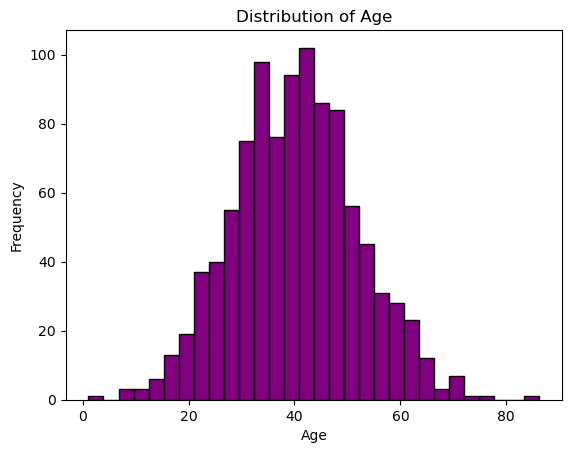

In [7]:
plt.hist(data['Age'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Les données sont normalement distribuées, elles montrent une sorte de motif régulier avec un pic.
L'histogramme des âges a des valeurs aberrantes.
python


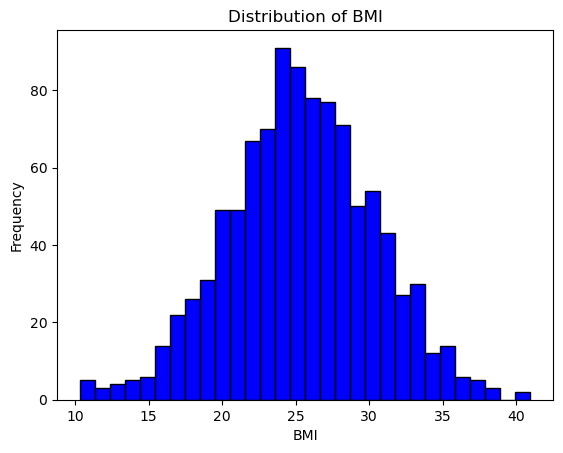

In [8]:
plt.hist(data['BMI'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

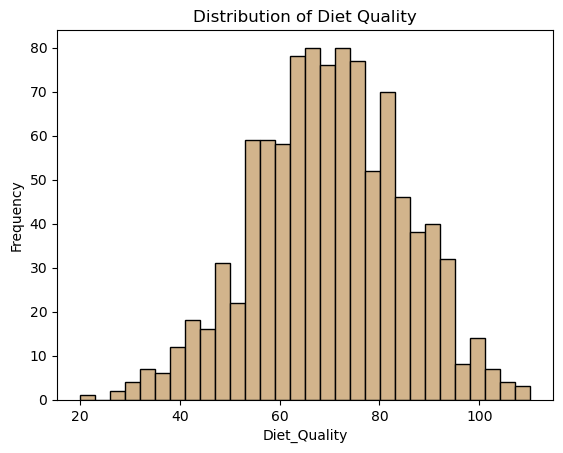

In [9]:
plt.hist(data['Diet_Quality'], bins=30, color='tan', edgecolor='black')
plt.title('Distribution of Diet Quality')
plt.xlabel('Diet_Quality')
plt.ylabel('Frequency')
plt.show()

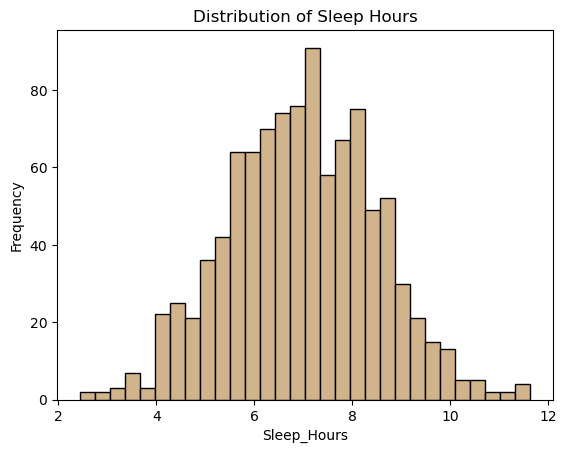

In [10]:
plt.hist(data['Sleep_Hours'], bins=30, color='tan', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep_Hours')
plt.ylabel('Frequency')
plt.show()

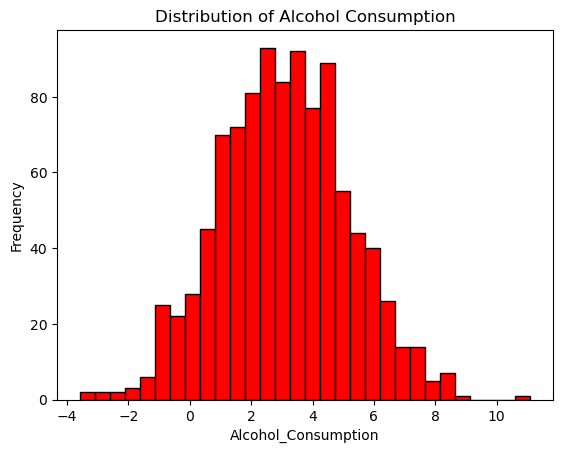

In [11]:
plt.hist(data['Alcohol_Consumption'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Frequency')
plt.show()

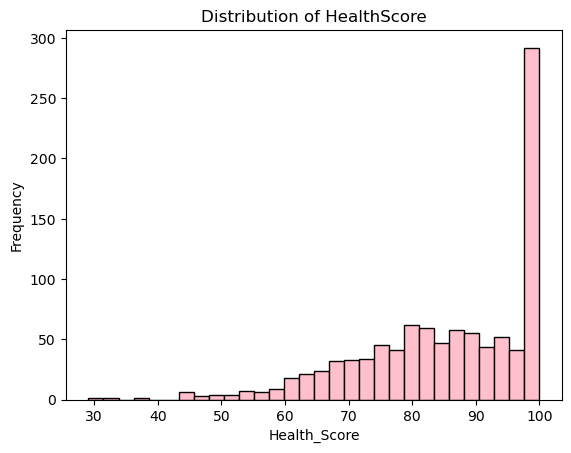

In [12]:
plt.hist(data['Health_Score'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of HealthScore')
plt.xlabel('Health_Score')
plt.ylabel('Frequency')
plt.show()

# #Identifier les outliers et comprendre les distributions des variables :

In [13]:
for col in quantitative_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    percentage = (len(outliers) / len(data)) * 100
    print(f"Colonne {col} : Nombre d'outliers = {len(outliers)} ({percentage:.2f}%)")

Colonne Age : Nombre d'outliers = 8 (0.80%)
Colonne BMI : Nombre d'outliers = 8 (0.80%)
Colonne Exercise_Frequency : Nombre d'outliers = 0 (0.00%)
Colonne Diet_Quality : Nombre d'outliers = 3 (0.30%)
Colonne Sleep_Hours : Nombre d'outliers = 6 (0.60%)
Colonne Smoking_Status : Nombre d'outliers = 0 (0.00%)
Colonne Alcohol_Consumption : Nombre d'outliers = 5 (0.50%)
Colonne Health_Score : Nombre d'outliers = 3 (0.30%)


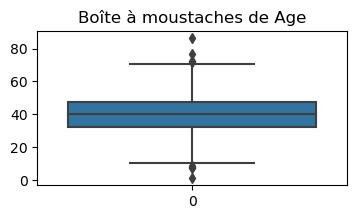

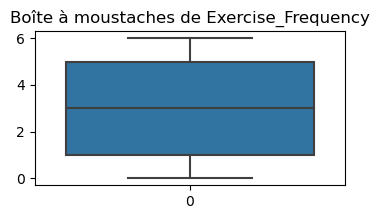

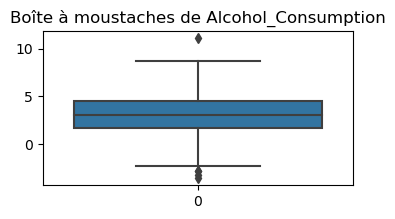

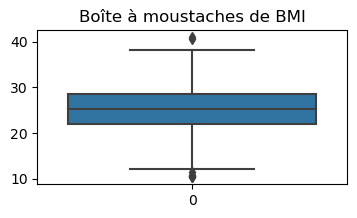

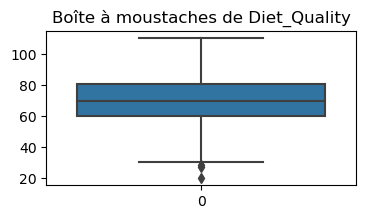

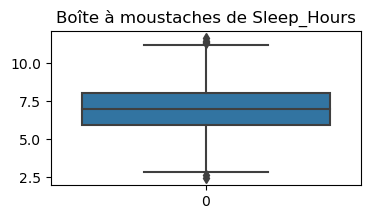

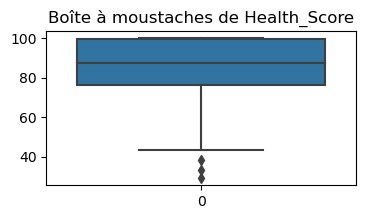

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['Age', 'Exercise_Frequency','Alcohol_Consumption','BMI','Diet_Quality','Sleep_Hours','Health_Score']:
 plt.figure(figsize=(4, 2)) # Ajuste la taille de la figure (largeur=6, hauteu
 sns.boxplot(data=data[col])
 plt.title(f"Boîte à moustaches de {col}")
 plt.show()

Results shows that the outliers count is < 5% so we can delete them as it won't affect the data.

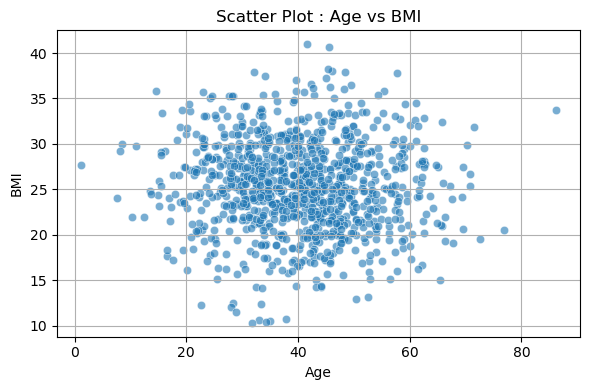

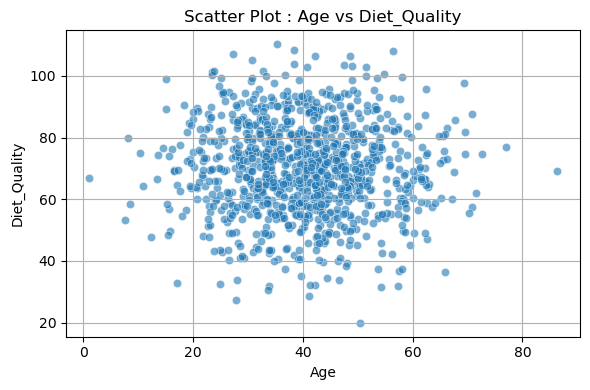

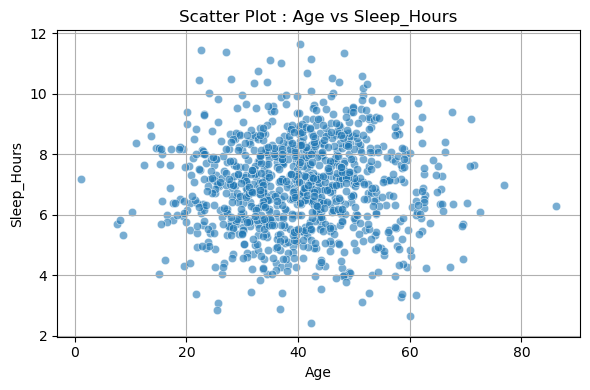

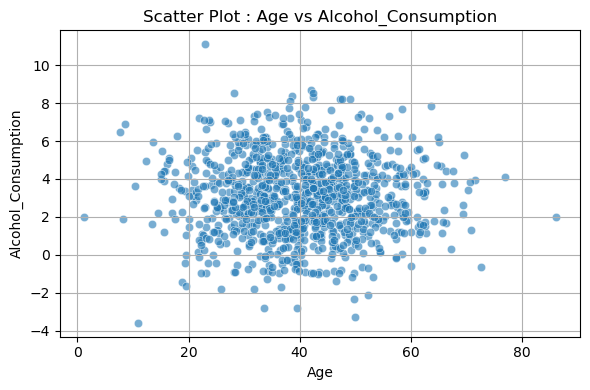

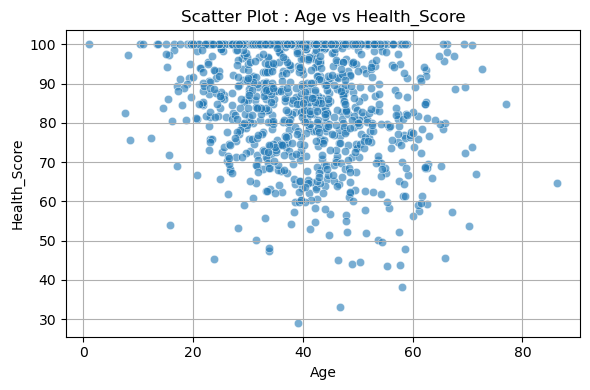

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à comparer avec 'Age'
cols_to_plot = ['BMI', 'Diet_Quality', 'Sleep_Hours', 'Alcohol_Consumption', 'Health_Score']

# Afficher un scatterplot pour chaque variable
for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Age', y=col, data=data, alpha=0.6)
    plt.title(f'Scatter Plot : Age vs {col}')
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:
prev_shape = None
while prev_shape != data.shape:
    prev_shape = data.shape
    for col in quantitative_vars:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

In [17]:
### Displaying results after removing the outliers

In [18]:
for col in quantitative_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    percentage = (len(outliers) / len(data)) * 100
    print(f"Colonne {col} : Nombre d'outliers = {len(outliers)} ({percentage:.2f}%)")

print(f"The new row count is : {len(data)}")

Colonne Age : Nombre d'outliers = 0 (0.00%)
Colonne BMI : Nombre d'outliers = 0 (0.00%)
Colonne Exercise_Frequency : Nombre d'outliers = 0 (0.00%)
Colonne Diet_Quality : Nombre d'outliers = 0 (0.00%)
Colonne Sleep_Hours : Nombre d'outliers = 0 (0.00%)
Colonne Smoking_Status : Nombre d'outliers = 0 (0.00%)
Colonne Alcohol_Consumption : Nombre d'outliers = 0 (0.00%)
Colonne Health_Score : Nombre d'outliers = 0 (0.00%)
The new row count is : 965


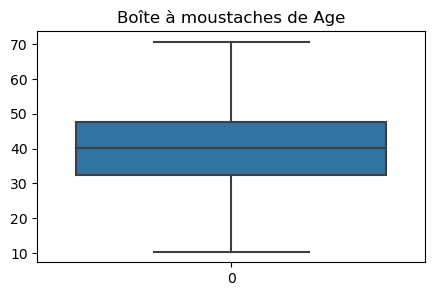

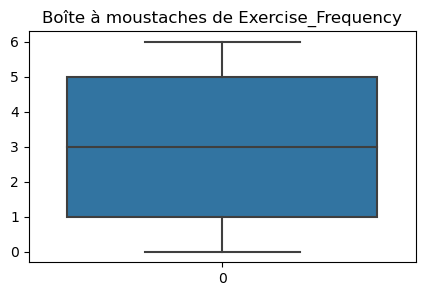

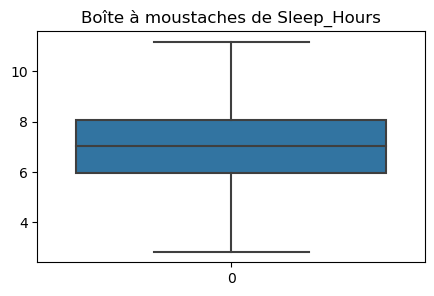

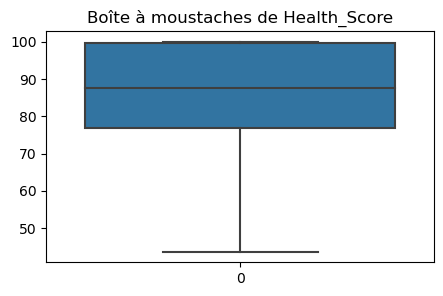

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['Age', 'Exercise_Frequency','Sleep_Hours','Health_Score']:
 plt.figure(figsize=(5, 3)) # Ajuste la taille de la figure (largeur=6, hauteu
 sns.boxplot(data=data[col])
 plt.title(f"Boîte à moustaches de {col}")
 plt.show()

In [20]:
#data base pour utiliser dans talend et DW 
data.to_csv('health-lifestyle-data_modified.csv', index=False ,encoding="utf-8")
print("\nThe DataFrame has been exported as a CSV file.")


The DataFrame has been exported as a CSV file.


## 3.2) Analyse multivariée

#Cela répond à d'autres questions et vérifie quelles sont les caractéristiques qui affectent directement le score de santé.

In [21]:
focused_Vs = data.loc[:, ["BMI", "Diet_Quality"]]
# La fonction loc fonctionne avec les index des colonnes.
#Nous avons créé un cadre de données composé de deux variables.
focused_Vs

,BMI,Diet_Quality
0,31.996777,55.403270
1,29.623168,41.838357
2,25.298152,76.904948
3,21.765316,49.756767
4,28.491117,44.218737
...,...,...
995,30.350751,60.674477
996,24.867394,66.527725
997,20.590627,69.819819
998,24.184665,70.724204


Maintenant, nous allons voir si nous pouvons créer un modèle de régression linéaire sur ce cadre de données.

Pour cela, nous devons examiner le nuage de points.
L'ombre autour de la ligne de régression montre l'intervalle de confiance.

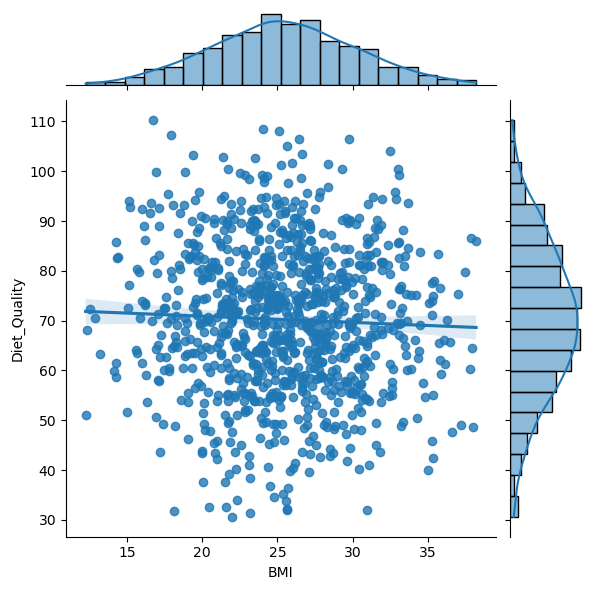

In [22]:
#Pour voir à la fois le nuage de points et le graphique des variables associées ensemble :
import seaborn as sbn
sbn.jointplot(x = "BMI",
              y = "Diet_Quality",
              data = focused_Vs,
              kind="reg")

In [23]:
#Nous allons créer une estimation à nouveau. Nous utiliserons les variables Heures_Sommeil et Consommation_Alcool.
focused_Vs = data.loc[:, ["Sleep_Hours", "Alcohol_Consumption"]]
focused_Vs

,Sleep_Hours,Alcohol_Consumption
0,7.300359,2.834707
1,7.012419,7.199517
2,6.028641,4.097944
3,5.802714,3.649377
4,7.912548,2.839795
...,...,...
995,8.470913,3.823116
996,5.355398,5.597395
997,8.641864,8.195167
998,7.941557,3.676134


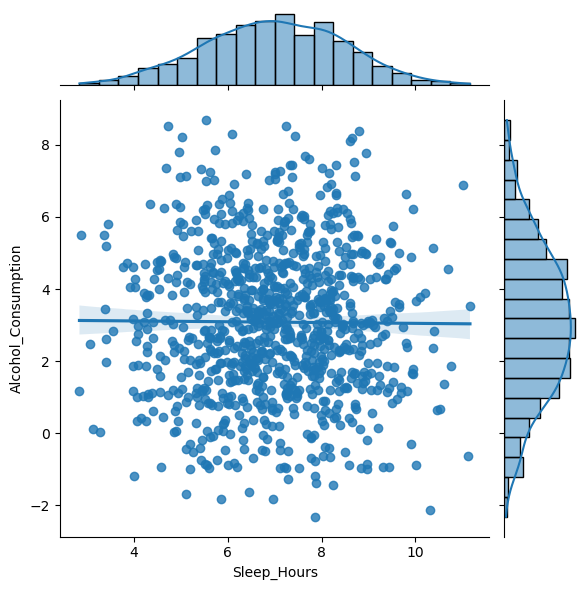

In [24]:
sbn.jointplot(x = "Sleep_Hours",
              y = "Alcohol_Consumption",
              data = focused_Vs,
              kind="reg")

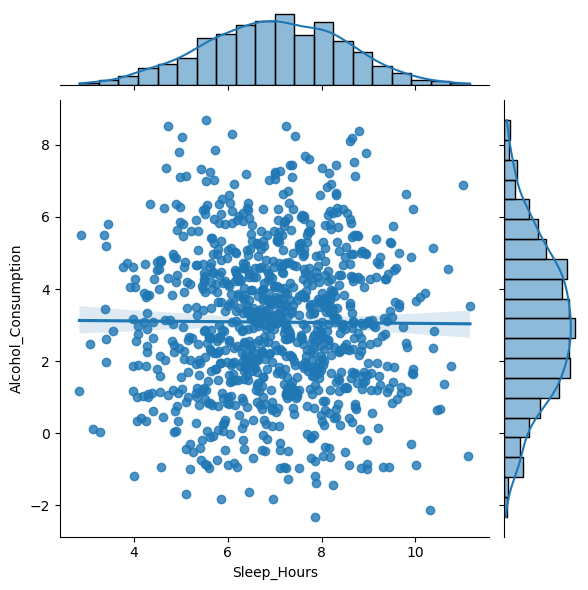

In [25]:
sbn.jointplot(x = "Sleep_Hours",
              y = "Alcohol_Consumption",
              data = focused_Vs,
              kind="reg")

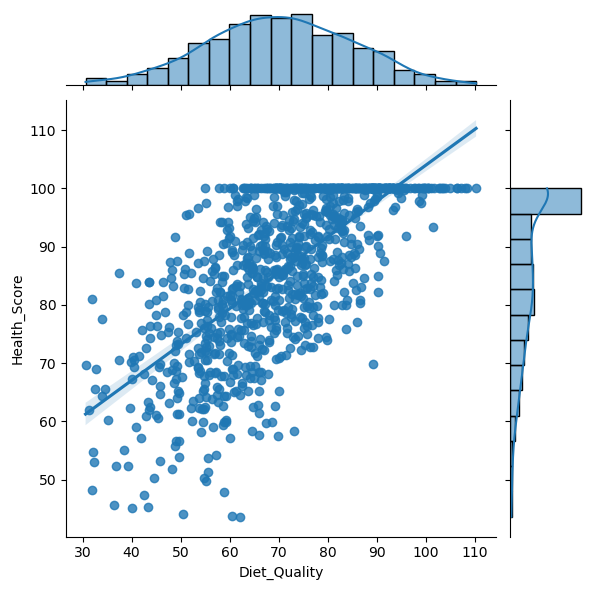

In [26]:
focused_Vs = data.loc[:, ["Diet_Quality", "Health_Score"]]

sbn.jointplot(x = "Diet_Quality",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

Que pouvons-nous conclure de ces graphiques ?

La qualité du régime et le score de santé sont définitivement corrélés positivement.

# 4) Data Preprocessing

Pour éviter les fuites de données, la standardisation des caractéristiques numériques doit toujours être effectuée après la séparation des données et uniquement sur les données d'entraînement.

Nous obtenons également toutes les statistiques nécessaires pour nos caractéristiques (moyenne et écart type) à partir des données d'entraînement et les utilisons également sur les données de test.

Notez que nous ne standardisons pas nos variables fictives (qui n'ont que des valeurs 0 ou 1).

## 4.1)min max scaler:

Nous ne pouvons pas commencer l'analyse car les échelles de nos variables indépendantes sont différentes. Tout d'abord, nous devons préparer les données pour l'analyse.

Nous mettons à l'échelle les observations dans les variables entre 0 et 1 avec le scaler min-max.

Préparons un outil qui appliquera l'opération min_max_scaler afin qu'il soit facile d'appeler cette opération chaque fois :

In [27]:
data_train,data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state = 1907)
scaler = MinMaxScaler()

In [28]:
data_train.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,40.060912,25.587398,2.862222,70.508650,6.990323,0.499259,3.051411,85.713600
std,11.348113,4.820761,1.976189,14.784516,1.474741,0.500370,2.029873,13.147674
min,10.340266,12.348562,0.000000,30.598206,2.838195,0.000000,-2.316953,43.711389
25%,32.186542,22.267553,1.000000,60.430375,5.945380,0.000000,1.572127,77.023695
50%,40.294122,25.412199,3.000000,70.552182,7.015516,0.000000,3.010506,87.462336
75%,47.498723,28.769082,5.000000,80.487406,8.020022,1.000000,4.441647,99.343330
max,70.721014,38.008416,6.000000,110.265186,11.164426,1.000000,8.687895,100.000000


## 4.2) Scale to fitting process with train and test sets

In [29]:
numeric_vals = ["Exercise_Frequency", "Smoking_Status"]

# When scaling, fitting is done through the train set.
data_train[numeric_vals] = scaler.fit_transform(data_train[numeric_vals])
data_test[numeric_vals] = scaler.fit_transform(data_test[numeric_vals])

## 4.3) Setting Train Set

In [30]:
#Séparer les variables dépendantes et indépendantes :
data_y_train = data_train.pop("Health_Score")
# Après ce processus, lorsque nous regardons l'ensemble d'entraînement, il n'y a plus de variable Score_Santé.
data_x_train =data_train

## 4.4) Setting Test Set

In [31]:
data_y_test = data_test.pop("Health_Score")
# Après ce processus, lorsque nous regardons l'ensemble de test, il n'y a plus de variable Score_Santé.
data_x_test = data_test

# 5) Modélisation des données

## 5.1) Création et définition du modèle


Nous allons passer en revue chaque caractéristique et la traiter de manière appropriée.

Mais d'abord, configurons notre ensemble de données avant de passer au prétraitement pour éviter la perte de données et pour une meilleure généralisation.

Configuration de nos caractéristiques et de la cible

In [32]:
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state = 1907)

Nous choisissons health_score  comme notre variable dépendante.
Nous essayons de prédire health symptoms en fonction des autres variables.
Nous avons assigné des variables fictives à nos variables indépendantes, qui sont des variables catégorielles (Exercise Frequency and Smoking Status).

## 5.2) Sélection de caractéristiques (RFE)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Créer un modèle de régression linéaire :
lm_RFE = LinearRegression()

# Ajuster le modèle sur les données d'entraînement :
lm_RFE.fit(data_x_train, data_y_train)

# Appliquer RFE pour sélectionner 5 variables indépendantes :
rfe = RFE(lm_RFE, n_features_to_select=5)
rfe.fit(data_x_train, data_y_train)

# Afficher les variables sélectionnées avec leur statut et leur rang :
for i in range(len(data_x_train.columns)):
    print(f"Variable: {data_x_train.columns[i]} | Sélectionnée: {rfe.support_[i]} | Rang: {rfe.ranking_[i]}")


Variable: Age | Sélectionnée: False | Rang: 3
Variable: BMI | Sélectionnée: True | Rang: 1
Variable: Exercise_Frequency | Sélectionnée: True | Rang: 1
Variable: Diet_Quality | Sélectionnée: False | Rang: 2
Variable: Sleep_Hours | Sélectionnée: True | Rang: 1
Variable: Smoking_Status | Sélectionnée: True | Rang: 1
Variable: Alcohol_Consumption | Sélectionnée: True | Rang: 1


*Il y a 7 variables au total. 5 d'entre elles ont 1. Parce qu'il a fait les prédictions avec 5 variables.

*Il y a 2 variables qu'il n'a pas incluses dans ce modèle parce qu'il les a jugées inutiles.

In [34]:
#Nous pouvons obtenir nos prédictions avec ces 5 variables.

y_pred_train = rfe.predict(data_x_train)
y_pred_train

array([ 85.33803143,  83.60822177,  87.97859014,  87.88488602,
        77.86836362,  98.90334916,  94.91474549,  75.64004936,
        83.25984702,  86.22706314,  81.68375725,  88.43503406,
        93.87805371,  84.02493345, 100.20334263,  91.13089984,
        74.67289298,  90.05036063,  79.30800792,  76.11478639,
        92.4580089 ,  91.95915848,  99.19383472,  92.24280375,
        90.01714831,  94.72836829,  92.09005844,  81.65376462,
        74.30254318,  91.68805177,  95.67299629,  94.31430257,
        80.23514514,  98.8350344 ,  97.84082259,  95.19351271,
        79.27671164,  80.89135034,  98.4594108 ,  74.74464006,
        75.71435268, 100.00596289, 102.87666972,  86.5127726 ,
        73.28647163,  79.33137719,  83.92029987,  84.55465447,
        91.93110675,  87.24409076,  79.67314693,  92.14401592,
        74.87563728,  82.65702924,  75.98329255, 107.85178082,
        89.34100183,  79.85106967,  72.26149142,  85.08188657,
        87.45461815,  77.92558887,  90.23916468,  86.52

In [35]:
y_pred_test = rfe.predict(data_x_test)
y_pred_test
# 164 of total observation

array([ 87.49523506,  82.40991111, 100.22739953,  74.62527946,
        94.27678697,  99.30119523,  81.74865693,  86.98825701,
        97.59803194,  75.65014744,  88.47718183,  78.10074992,
        85.04712215,  95.00953693,  78.9583436 ,  74.83500827,
        97.30668432,  89.96404893,  73.69675284,  86.83466153,
        80.53384625,  83.80398843,  80.11605188, 100.5109991 ,
        88.34927329,  85.64722786,  82.38208237,  93.33402296,
        82.60059898,  84.60249352,  92.29816773,  96.52542579,
        83.73909202,  88.72301695,  83.82889135,  95.79048213,
        83.1863009 ,  80.58165313,  70.44540635,  89.80066123,
        96.43029151,  78.3813029 ,  90.14402347,  71.29278773,
        84.9796082 ,  77.19509289,  88.04946314, 100.3165534 ,
        76.92786343,  86.46739907,  85.17992423,  89.93794093,
        88.57655017,  88.97896814,  81.33856578,  82.68918091,
        75.61576748,  92.87856961,  99.80922252,  97.84435095,
        97.6230782 ,  89.27219342,  79.08480021, 102.04

In [36]:
# RFE avec 6 variables
rfe1 = RFE(lm_RFE, n_features_to_select=6)
rfe1.fit(data_x_train, data_y_train)

# Afficher les résultats sans zip
for i in range(len(data_x_train.columns)):
    print(f"Variable : {data_x_train.columns[i]} | Sélectionnée : {rfe1.support_[i]} | Rang : {rfe1.ranking_[i]}")

Variable : Age | Sélectionnée : False | Rang : 2
Variable : BMI | Sélectionnée : True | Rang : 1
Variable : Exercise_Frequency | Sélectionnée : True | Rang : 1
Variable : Diet_Quality | Sélectionnée : True | Rang : 1
Variable : Sleep_Hours | Sélectionnée : True | Rang : 1
Variable : Smoking_Status | Sélectionnée : True | Rang : 1
Variable : Alcohol_Consumption | Sélectionnée : True | Rang : 1


*Lorsque nous prenons 6 variables, il utilise les variables IMC, Fréquence_Exercice, Qualité_Régime, Heures_Sommeil, Statut_Fumeur, Consommation_Alcool.

*Nous pouvons vouloir obtenir des informations sur le nombre de variables à utiliser.

# 5.3)Cross Validation

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold

# Il y a 13 colonnes au total
n_features_total = len(data_x_train.columns)

# Définir les folds pour la validation croisée
fold_CVGS = KFold(n_splits=5, shuffle=True, random_state=1907)

# Définir les hyperparamètres à tester : ici, de 1 à 7 variables sélectionnées
hyper_params_CVGS = [{'n_features_to_select': list(range(1, 8))}]

# Créer le modèle de base
lm_CVGS = LinearRegression()

# Définir RFE sans spécifier n_features (sera géré par GridSearch)
rfe_CVGS = RFE(estimator=lm_CVGS)

# Créer l’objet GridSearchCV
model_CVGS = GridSearchCV(estimator=rfe_CVGS,
                          param_grid=hyper_params_CVGS,
                          scoring='r2',
                          cv=fold_CVGS,
                          verbose=1,
                          return_train_score=True)

# Exécuter la recherche
model_CVGS.fit(data_x_train, data_y_train)
print("Meilleur nombre de variables sélectionnées :", model_CVGS.best_params_)
print("Meilleur score R² :", model_CVGS.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Meilleur nombre de variables sélectionnées : {'n_features_to_select': 7}
Meilleur score R² : 0.8265388167187592


In [38]:
# Get the best number of variables:
model_CVGS.best_params_

# Find the R^2 score for the best number of variables:
model_CVGS.best_score_

# Convert the relevant results to a dataframe:
result_CVGS = pd.DataFrame(model_CVGS.cv_results_)
result_CVGS

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041659,0.017047,0.003906,0.001348,1,{'n_features_to_select': 1},0.077854,0.023162,0.096706,0.033374,...,0.054662,0.027950,7,0.059501,0.074617,0.055293,0.066315,0.065233,0.064192,0.006564
1,0.027046,0.006809,0.003222,0.000391,2,{'n_features_to_select': 2},0.056182,0.123100,0.078674,0.032063,...,0.063924,0.034562,6,0.074347,0.102922,0.068935,0.122502,0.125242,0.098790,0.023528
2,0.028144,0.002115,0.003736,0.000754,3,{'n_features_to_select': 3},0.091347,0.142332,0.157236,0.049948,...,0.096443,0.046956,5,0.121094,0.106129,0.105369,0.127307,0.131757,0.118331,0.010820
3,0.023986,0.004180,0.003989,0.000645,4,{'n_features_to_select': 4},0.264369,0.336159,0.380810,0.181662,...,0.302112,0.071205,4,0.332782,0.313875,0.306148,0.349728,0.309220,0.322350,0.016524
4,0.021517,0.001592,0.003192,0.000370,5,{'n_features_to_select': 5},0.294673,0.314831,0.408882,0.177327,...,0.315869,0.081102,3,0.346722,0.341004,0.321565,0.372149,0.321401,0.340568,0.018782
5,0.017265,0.001596,0.003663,0.000582,6,{'n_features_to_select': 6},0.801593,0.765430,0.776614,0.787000,...,0.791012,0.020524,2,0.796885,0.805688,0.802676,0.799599,0.790249,0.799019,0.005285
6,0.009408,0.000980,0.003826,0.000416,7,{'n_features_to_select': 7},0.814666,0.818497,0.818273,0.847294,...,0.826539,0.012328,1,0.837192,0.836239,0.836682,0.828857,0.832220,0.834238,0.003217


# 5.4) Visualization of the results

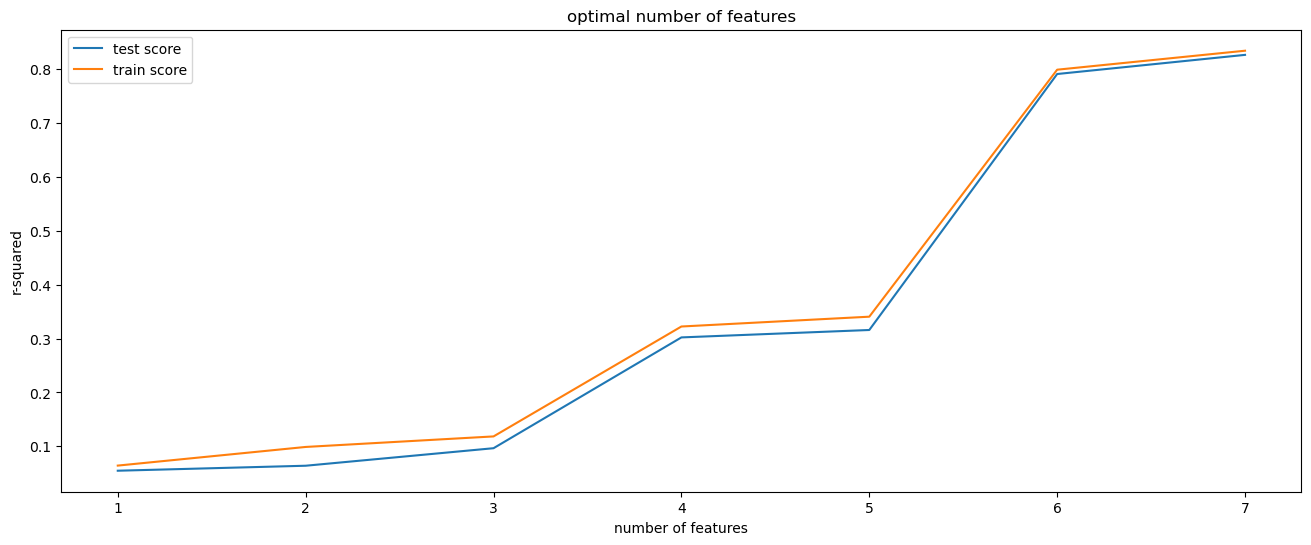

In [39]:
plt.figure(figsize=(16, 6));

plt.plot(result_CVGS['param_n_features_to_select'], result_CVGS['mean_test_score']);
plt.plot(result_CVGS['param_n_features_to_select'], result_CVGS['mean_train_score']);
plt.xlabel("number of features");
plt.ylabel("r-squared");
plt.title("optimal number of features");
plt.legend(["test score","train score"], loc= "upper left");

# 5.5) Modèle final

In [40]:
n_features_optimal =  7
lm_final = LinearRegression()
lm_final.fit(data_x_train,data_y_train)

rfe_final = RFE(lm_final,n_features_to_select=n_features_optimal)
rfe_final = rfe_final.fit(data_x_train,data_y_train)

# 5.6) Predictions and MAE, MSE, R2, RMSE

In [41]:
import sklearn
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# Predictions and error for the test set
y_pred_test_final = lm_final.predict(data_x_test)
r2 = sklearn.metrics.r2_score(data_y_test, y_pred_test_final)
mae= sklearn.metrics.mean_absolute_error(data_y_test,y_pred_test_final)
mse = mean_squared_error(data_y_test, y_pred_test_final)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 4.371194662233815
Mean Squared Error (MSE): 30.75930487576429
Root Mean Squared Error (RMSE): 5.546107182138143
R2 Score: 0.8306785525619382


 Interprétation :

Un MAE de 4.45 indique que, en moyenne, le modèle se trompe de 4,45 unités dans la prédiction du score de santé, ce qui reste raisonnable selon l’échelle des valeurs.

Le MSE et le RMSE confirment la dispersion des erreurs : bien que le MSE soit de 32.25, son interprétation directe est moins intuitive. En revanche, le RMSE de 5.68 exprime une erreur moyenne quadratique modérée.

Le coefficient de détermination (R² = 0.81) est très satisfaisant, signifiant que 81 % de la variance du score de santé est expliquée par les variables du modèle.

✅ Conclusion globale :
Le modèle présente une bonne capacité prédictive. Il permet de prédire de manière fiable le score de santé à partir des données comportementales et physiques. Les résultats montrent que la relation entre les variables indépendantes (habitudes de vie) et la variable cible (health score) est bien capturée.